In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
file_path = "C:/Users/PC/Desktop/midproject/data/전공일치.xlsx"
df = pd.read_excel(file_path)

# 첫 행을 컬럼으로 설정
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)

c:\Users\PC\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df_filtered = df[(df['연령별'] == '15~29세') & (df['성별'] == '계')]


In [4]:
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

In [7]:
year_columns = {
    '2017': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2018': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2019': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2020': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2021': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2022': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2023': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
    '2024': ['계', '매우 불일치', '약간 불일치', '그런대로 일치', '매우 일치'],
}

In [8]:
# 열 인덱스 기준으로 연도별 그룹 만들기 (2017: 2~6, 2018: 7~11, ...)
year_ranges = {
    '2017': df.columns[2:7],
    '2018': df.columns[7:12],
    '2019': df.columns[12:17],
    '2020': df.columns[17:22],
    '2021': df.columns[22:27],
    '2022': df.columns[27:32],
    '2023': df.columns[32:37],
    '2024': df.columns[37:42],
}

labels = ['매우일치', '일치', '보통', '불일치', '매우불일치']  # 나중에 순서 맞게 바꿔줄게
reverse_labels = labels[::-1]


In [10]:
values = df_filtered[cols].iloc[0]
values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)
values = list(values)[1:]  # '계' 제외한 4개 항목만 사용

In [11]:
values = df_filtered[cols[1:]].iloc[0]
values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)

c:\Users\PC\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\PC\AppData\Local\Temp\ipykernel_39000\3497805622.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = (values[i] / total) * 100 if total > 0 else 0
C:\Users\PC\AppData\Local\Temp\ipykernel_39000\3497805622.py:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = (values[i] / total) * 100 if total > 0 else 0
C:\Users\PC\AppData\Local\Temp\ipykernel_39000\3497805622.py:45: FutureWarning

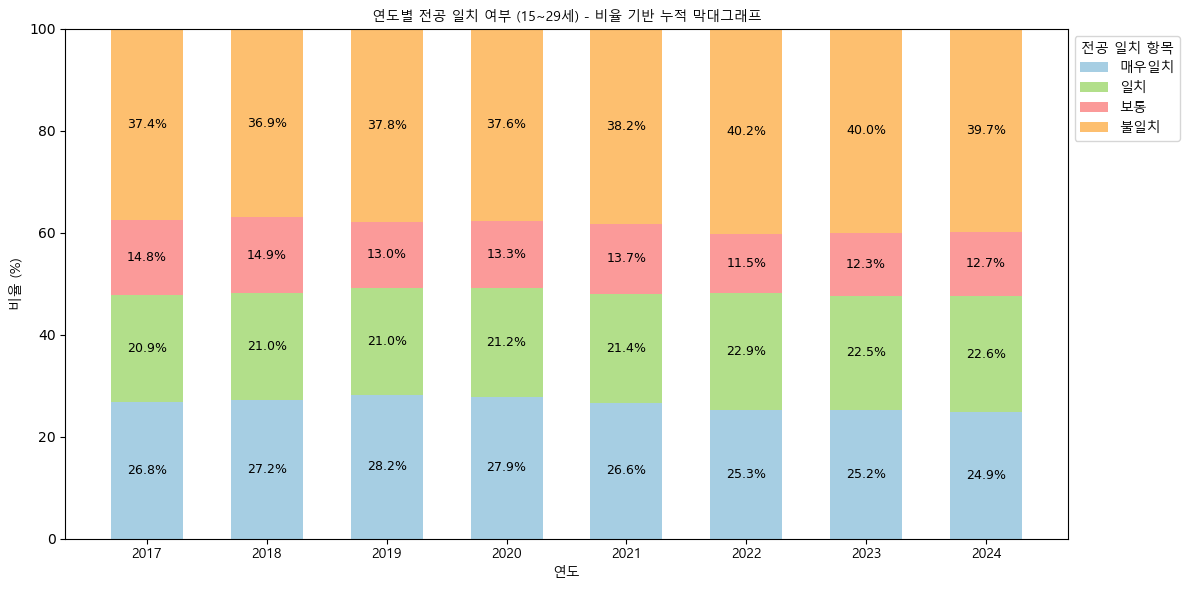

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 1. 엑셀 파일 불러오기
file_path = "C:/Users/PC/Desktop/midproject/data/전공일치.xlsx"
df = pd.read_excel(file_path)

# 2. 첫 행을 컬럼으로 지정
df.columns = df.iloc[0]
df = df.drop(0).reset_index(drop=True)
df.columns = df.columns.astype(str)

# 3. 조건 필터링 (15~29세, 전체 성별)
df_filtered = df[(df['연령별'] == '15~29세') & (df['성별'] == '계')]

# 4. 한글 폰트 설정 (Windows 기준)
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 5. 연도별 열 인덱스 설정 (매우일치~불일치 순서)
year_indices = {
    '2017': list(range(3, 7)),
    '2018': list(range(8, 12)),
    '2019': list(range(13, 17)),
    '2020': list(range(18, 22)),
    '2021': list(range(23, 27)),
    '2022': list(range(28, 32)),
    '2023': list(range(33, 37)),
    '2024': list(range(38, 42)),
}

# 6. 응답 항목 정의
categories = ['매우일치', '일치', '보통', '불일치']
category_percent = {cat: [] for cat in categories}

# 7. 퍼센트 값 계산
for year, idxs in year_indices.items():
    values = df_filtered.iloc[0, idxs]
    values = pd.to_numeric(values, errors='coerce').fillna(0).astype(int)
    values = values[::-1]  # 매우일치 ~ 불일치 순서로 맞추기
    total = values.sum()
    for i, cat in enumerate(categories):
        pct = (values[i] / total) * 100 if total > 0 else 0
        category_percent[cat].append(pct)

# 8. 파스텔톤 색상
pastel_colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f']

# 9. 누적 막대그래프 그리기
x = np.arange(len(year_indices))  # 연도 인덱스 (0~7)
bar_width = 0.6
bottom = np.zeros(len(year_indices))

plt.figure(figsize=(12, 6))

for i, cat in enumerate(categories):
    heights = category_percent[cat]
    bars = plt.bar(x, heights, bar_width, bottom=bottom, label=cat, color=pastel_colors[i])
    
    # 막대 내부에 퍼센트 텍스트 표시
    for j in range(len(x)):
        y_pos = bottom[j] + heights[j] / 2
        if heights[j] >= 5:
            plt.text(x[j], y_pos, f'{heights[j]:.1f}%', ha='center', va='center', fontsize=9)
    
    bottom += heights  # 다음 항목 누적

# 10. 그래프 설정
plt.xticks(x, list(year_indices.keys()), fontproperties=fontprop)
plt.xlabel("연도", fontproperties=fontprop)
plt.ylabel("비율 (%)", fontproperties=fontprop)
plt.title("연도별 전공 일치 여부 (15~29세) - 비율 기반 누적 막대그래프", fontproperties=fontprop)
plt.ylim(0, 100)

# ✅ 11. 범례 제목도 한글 폰트 적용 (깨짐 방지!)
plt.legend(
    title="전공 일치 항목",
    title_fontproperties=fontprop,  # ← 범례 제목 폰트
    prop=fontprop,                 # ← 항목 폰트
    loc='upper left',
    bbox_to_anchor=(1, 1)
)

plt.tight_layout()
plt.show()
